In [1]:
import pandas as pd

In [13]:
runkeeper_file = 'datasets/cardioActivities.csv'

In [10]:
pd.read_csv(runkeeper_file, parse_dates=['Date'], index_col='Date')

In [14]:
display(df_activities.sample(3))


,Activity Id,Type,Route Name,Distance (km),Duration,Average Pace,Average Speed (km/h),Calories Burned,Climb (m),Average Heart Rate (bpm),Friend's Tagged,Notes,GPX File
Date,,,,,,,,,,,,,
2013-12-04 18:36:22,0a1d041d-9ea5-438a-a2df-dcac74a33116,Running,NaN,12.48,1:10:42,5:40,10.59,896.000000,69,NaN,NaN,NaN,2013-12-04-183622.gpx
2013-02-22 19:23:38,df659987-77a5-4c7b-8633-74dbb15d3390,Running,NaN,6.32,35:58,5:41,10.55,454.000000,35,NaN,NaN,NaN,2013-02-22-192338.gpx
2016-07-10 16:35:25,85014381-7900-49e2-88f0-42c75e0954c1,Running,NaN,19.27,1:49:48,5:42,10.53,1323.999999,319,142.0,NaN,TomTom MySports Watch,2016-07-10-163525.gpx


In [22]:
df_activities.tail()

,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,,,,
2012-08-28 07:06:57,Walking,1.57,13:39,8:41,6.91,7,NaN
2012-08-24 12:59:42,Walking,1.48,17:56,12:09,4.94,12,NaN
2012-08-24 10:12:16,Walking,1.49,13:43,9:14,6.49,9,NaN
2012-08-24 08:13:12,Running,3.15,16:00,5:05,11.82,17,NaN
2012-08-22 18:53:54,Running,5.69,31:08,5:29,10.95,32,NaN


In [8]:
df_activities.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 508 entries, 2018-11-11 14:05:12 to 2012-08-22 18:53:54
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Activity Id               508 non-null    object 
 1   Type                      508 non-null    object 
 2   Route Name                1 non-null      object 
 3   Distance (km)             508 non-null    float64
 4   Duration                  508 non-null    object 
 5   Average Pace              508 non-null    object 
 6   Average Speed (km/h)      508 non-null    float64
 7   Calories Burned           508 non-null    float64
 8   Climb (m)                 508 non-null    int64  
 9   Average Heart Rate (bpm)  294 non-null    float64
 10  Friend's Tagged           0 non-null      float64
 11  Notes                     231 non-null    object 
 12  GPX File                  504 non-null    object 
dtypes: float64(5), int64(1), obj

### Data Preprocessing

In [16]:
# Defining the list of columns to be deleted
cols_to_drop = ['Friend\'s Tagged','Route Name','GPX File','Activity Id','Calories Burned', 'Notes']


In [17]:
# Dropping the unnecessary columns

df_activities.drop(cols_to_drop, axis=1, inplace=True)

In [18]:
# Counting the types of training activities

display(df_activities.Type.value_counts())

Running    459
Cycling     29
Walking     18
Other        2
Name: Type, dtype: int64

In [19]:
# Renaming the feature 'Other' type to 'Unicycling'

df_activities['Type'] = df_activities['Type'].str.replace('Other', 'Unicycling', regex=False)

In [20]:
# Count missing values for each column

df_activities.isnull().sum(axis=0)

Type                          0
Distance (km)                 0
Duration                      0
Average Pace                  0
Average Speed (km/h)          0
Climb (m)                     0
Average Heart Rate (bpm)    214
dtype: int64

### Handling Missing Values

We can clearly see from the last output,that there are 214 missing entries for average heart rate in bpm.
We can fill in the missing values with an average value. This process is called mean imputation. When we do imputation to fill in missing values,we must be aware of the fact that the average heart rate varies for different activities.So we need to filter the dataframes by Type and calculate each activity's average heart rate, and then replace in the missing values with those means.

In [25]:
# calculating means for heart rate of different types of activities mentioned

mean_hour_run = df_activities[df_activities['Type']=='Running']['Average Heart Rate (bpm)'].mean()

mean_hour_walk = df_activities[df_activities['Type']=='Walking']['Average Heart Rate (bpm)'].mean()

mean_hour_cycle = df_activities[df_activities['Type']=='Cycling']['Average Heart Rate (bpm)'].mean()

In [26]:
#copying the splitted dataframes for simplified task
df_run = df_activities[df_activities['Type'] == 'Running'].copy()

df_walk = df_activities[df_activities['Type'] == 'Walking'].copy()

df_cycle = df_activities[df_activities['Type'] == 'Cycling'].copy()

In [29]:
# Filling missing values with counted mean values
df_walk['Average Heart Rate (bpm)'].fillna(float(mean_hour_walk), inplace=True)

df_run['Average Heart Rate (bpm)'].fillna(int(mean_hour_run), inplace=True)

df_cycle['Average Heart Rate (bpm)'].fillna(int(mean_hour_cycle), inplace=True)

In [30]:
#count the missing values
df_run.isnull().sum()

Type                        0
Distance (km)               0
Duration                    0
Average Pace                0
Average Speed (km/h)        0
Climb (m)                   0
Average Heart Rate (bpm)    0
dtype: int64

### Plotting Running Data

In [31]:
# importing matplotlib and setting it as matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
plt.style.use('ggplot')
warnings.filterwarnings(action='ignore',module='matplotlib.figure',category= UserWarning)



In [32]:
# subsetting running data from 2013 till 2018
runs_subset_2013_2018 = df_run['2018':'2012']


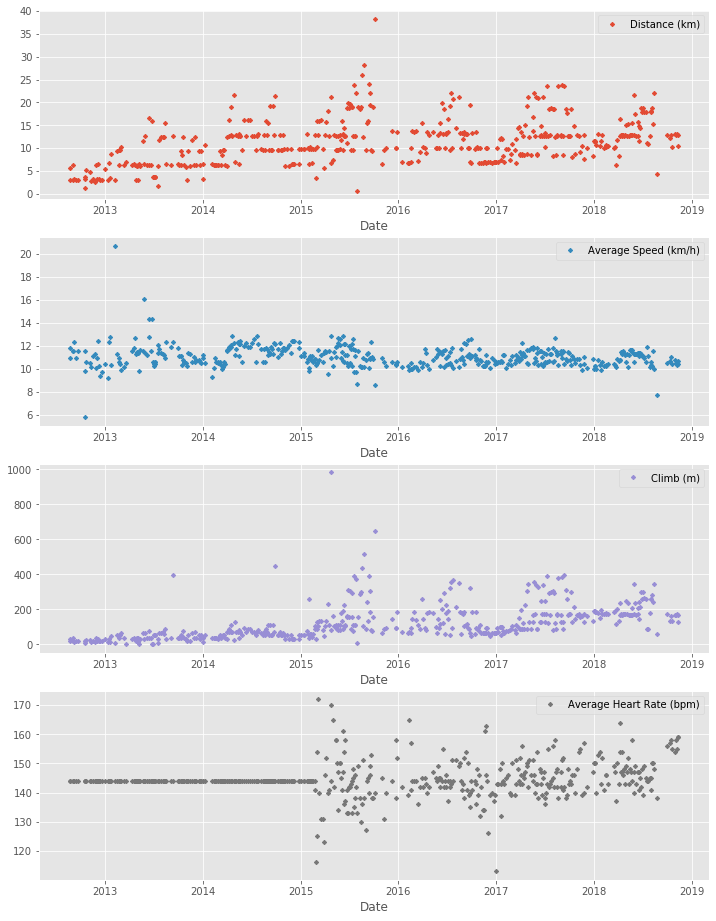

In [45]:
# creating subplots and customizing it in a single step
runs_subset_2013_2018.plot(subplots=True,
                        sharex=False,
                         figsize=(12,16),
                         linestyle='none',
                         marker="D",
                         markersize='3')
plt.show()

### Running Statistics

In [46]:
runs_subset_2015_2018 = df_run[(df_run.index <= '2018') & (df_run.index >='2015') ]
runs_subset_2015_2018.head()

,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,,,,
2017-12-30 17:11:53,Running,11.69,1:10:16,6:01,9.98,192,150.0
2017-12-27 18:50:24,Running,8.29,45:56,5:33,10.83,131,147.0
2017-12-04 18:14:41,Running,10.00,59:43,5:58,10.05,160,142.0
2017-11-25 12:17:22,Running,12.85,1:10:04,5:27,11.00,176,157.0
2017-11-22 18:21:12,Running,7.55,43:29,5:46,10.42,129,140.0


In [47]:
runs_subset_2015_2018.tail()

,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,,,,
2015-01-28 18:43:29,Running,10.02,55:13,5:31,10.89,61,144.0
2015-01-26 18:30:18,Running,13.11,1:14:30,5:41,10.55,76,144.0
2015-01-14 17:50:00,Running,9.78,52:45,5:24,11.12,51,144.0
2015-01-12 18:20:00,Running,9.78,51:45,5:18,11.34,51,144.0
2015-01-03 17:20:00,Running,9.78,52:45,5:24,11.12,51,144.0


In [54]:
#fetching running data for last 4 years
runs_subset_2015_2018 = df_run['2018':'2015']
runs_subset_2015_2018.head()

,Type,Distance (km),Duration,Average Pace,Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,,,,
2018-11-11 14:05:12,Running,10.44,58:40,5:37,10.68,130,159.0
2018-11-09 15:02:35,Running,12.84,1:14:12,5:47,10.39,168,159.0
2018-11-04 16:05:00,Running,13.01,1:15:16,5:47,10.37,171,155.0
2018-11-01 14:03:58,Running,12.98,1:14:25,5:44,10.47,169,158.0
2018-10-27 17:01:36,Running,13.02,1:12:50,5:36,10.73,170,154.0


In [56]:
#evaluating annual statistics
print('My average run in last four years: ')
display(runs_subset_2015_2018.resample('A').mean())

#evaluating weekly statistics
print('Weekly average of last 4 years: ')
display(runs_subset_2015_2018.resample('W').mean().mean())

#weekly counts average
weekly_counts_average = runs_subset_2015_2018['Distance (km)'].resample('W').count().mean()
print("Number of trainings per week on average :",weekly_counts_average)

My average run in last four years: 


,Distance (km),Average Speed (km/h),Climb (m),Average Heart Rate (bpm)
Date,,,,
2015-12-31,13.602805,10.998902,160.170732,143.353659
2016-12-31,11.411667,10.837778,133.194444,143.388889
2017-12-31,12.935176,10.959059,169.376471,145.247059
2018-12-31,13.339063,10.777969,191.218750,148.125000


Weekly average of last 4 years: 


Distance (km)                12.518176
Average Speed (km/h)         10.835473
Climb (m)                   158.325444
Average Heart Rate (bpm)    144.801775
dtype: float64

Number of trainings per week on average : 1.5
